# Семинар 2. Краткий обзор Numpy. Pandas.

## Numpy

<i>numpy</i> - одно из фундаментальных расширений языка Python для выполнения научных вычислений. Кроме всего прочего предоставляет:

    Мощный объект для работы с данными - N-мерный массив
    Высокоуровневые математические функции
    Инструменты для интеграции программного кода на C/C++ и Fortran
    Реализации функций линейной алгебры, преобразования Фурье, генерации случайных чисел


Основные структуры в <i>pandas</i>:

<b>Series</b> – проиндексированный вектор значений. Имя элемента соответствует индексу, а значение – значению записи.

<b>DataFrame</b> — проиндексированный многомерный массив значений, соответственно каждый столбец DataFrame является структурой Series.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

Немного о <b>Series</b>

In [3]:
pd.Series([2, 3, 6, 9, 'm'])

0    2
1    3
2    6
3    9
4    m
dtype: object

In [7]:
s1 = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print 'Initial\n', s1, '\n'
s1['d'] = 2
print 'Modified\n', s1

Initial
a    0.443897
b   -1.067706
c   -0.881259
d    1.648285
e   -2.120162
dtype: float64 

Modified
a    0.443897
b   -1.067706
c   -0.881259
d    2.000000
e   -2.120162
dtype: float64


In [25]:
pd.Series(0, index=['a', 'b', 'c', 'd', 'e'])

a    0
b    0
c    0
d    0
e    0
dtype: int64

**Поведение Series немного похоже на поведение ndarray**

In [27]:
s1[0]

-0.36872459490328752

In [35]:
s1[s1 > 0]

c    0.471481
d    2.000000
dtype: float64

In [31]:
s1[[4, 2, 1]]

e   -1.024658
c    0.471481
b   -0.201952
dtype: float64

In [32]:
np.exp(s1)

a    0.691616
b    0.817134
c    1.602365
d    7.389056
e    0.358919
dtype: float64

**Арифметика**

In [34]:
s1 + s1

a   -0.737449
b   -0.403905
c    0.942961
d    4.000000
e   -2.049315
dtype: float64

In [33]:
s1[1:] + s1[:-1]

a         NaN
b   -0.403905
c    0.942961
d    4.000000
e         NaN
dtype: float64

In [10]:
ar1 = np.array([1, 2, 5, 8, 9])
ar1[1:] + ar1[:-1]

array([ 3,  7, 13, 17])

In [46]:
s2 = pd.Series([2, 5, 4, 3, 2], name='grades')
s2.name

'grades'

<b>DataFrame</b> - наиболее часто используемый объект в <i>pandas</i>. Для инициализации можно использовать

        Словарь, в котором значениями являются 1D ndarray, списки, словари или Series
        2-D numpy.ndarray
        Другой DataFrame
        И т. д.



In [11]:
df1 = pd.DataFrame({'age': [20, 18, 17, 19, 18],
                   'city': ['Msk', 'Spb', 'Msk', 'Nov', 'Tmn'],
                   'name': ['Alexander', 'Maria', 'Daria', 'Nikolay', 'Anatoliy'],
                   'sex': ['M', 'F', 'F', 'M', 'M']})

In [63]:
df1

age city       name sex
0   20  Msk  Alexander   M
1   18  Spb      Maria   F
2   17  Msk      Daria   F
3   19  Nov    Nikolay   M
4   18  Tmn   Anatoliy   M

**Индексация**

In [40]:
df1['age']

0    20
1    18
2    17
3    19
4    18
Name: age, dtype: int64

In [41]:
df1.age

0    20
1    18
2    17
3    19
4    18
Name: age, dtype: int64

In [64]:
df1[['name', 'city']]

name city
0  Alexander  Msk
1      Maria  Spb
2      Daria  Msk
3    Nikolay  Nov
4   Anatoliy  Tmn

In [65]:
df1[0: 2]

age city       name sex
0   20  Msk  Alexander   M
1   18  Spb      Maria   F

In [66]:
df1[[0, 2]]

age       name
0   20  Alexander
1   18      Maria
2   17      Daria
3   19    Nikolay
4   18   Anatoliy

In [67]:
df1.ix[[0, 2]]

age city       name sex
0   20  Msk  Alexander   M
2   17  Msk      Daria   F

In [12]:
df1.loc[[0, 2]]

age city       name sex
0   20  Msk  Alexander   M
2   17  Msk      Daria   F

In [68]:
df1.iloc[:2, :3]

age city       name
0   20  Msk  Alexander
1   18  Spb      Maria

In [70]:
df1[df1.city == 'Msk']

age city       name sex
0   20  Msk  Alexander   M
2   17  Msk      Daria   F

**Что можно узнать о данных?**

In [57]:
df1.describe()

age
count   5.000000
mean   18.400000
std     1.140175
min    17.000000
25%    18.000000
50%    18.000000
75%    19.000000
max    20.000000

In [58]:
df1.age.mean()

18.399999999999999

In [59]:
df1.sex.value_counts()

M    3
F    2
Name: sex, dtype: int64

In [71]:
df1.city.unique()

array(['Msk', 'Spb', 'Nov', 'Tmn'], dtype=object)

**Группировка**

In [72]:
df1.groupby('city').age.mean()

city
Msk    18.5
Nov    19.0
Spb    18.0
Tmn    18.0
Name: age, dtype: float64

In [75]:
df1.ix[df1.groupby('city').age.idxmin()]

age city      name sex
2   17  Msk     Daria   F
3   19  Nov   Nikolay   M
1   18  Spb     Maria   F
4   18  Tmn  Anatoliy   M

**Операции с таблицами**

In [12]:
#Вставка столбцов

In [10]:
country = pd.Series('RU', index=range(5))
df1.insert(2,'country',country)

In [11]:
df1

age city country       name sex
0   20  Msk      RU  Alexander   M
1   18  Spb      RU      Maria   F
2   17  Msk      RU      Daria   F
3   19  Nov      RU    Nikolay   M
4   18  Tmn      RU   Anatoliy   M

In [19]:
df2 = pd.DataFrame({'age': [20, 21],
                   'name': ['Katerina', 'Boris'],
                   'sex': ['F', 'M']})
df4 = df1.append(df2)
df4

age city country       name sex
0   20  Msk      RU  Alexander   M
1   18  Spb      RU      Maria   F
2   17  Msk      RU      Daria   F
3   19  Nov      RU    Nikolay   M
4   18  Tmn      RU   Anatoliy   M
0   20  NaN     NaN   Katerina   F
1   21  NaN     NaN      Boris   M

In [15]:
df1

age city country       name sex
0   20  Msk      RU  Alexander   M
1   18  Spb      RU      Maria   F
2   17  Msk      RU      Daria   F
3   19  Nov      RU    Nikolay   M
4   18  Tmn      RU   Anatoliy   M

In [17]:
df3 = pd.DataFrame({'city': ['Msk', 'Spb', 'Nov', 'Tmn'],
                   'population': [15.6, 5.2, 0.22, 0.7]})

In [18]:
df1.merge(df3, on='city')

age city country       name sex  population
0   20  Msk      RU  Alexander   M       15.60
1   17  Msk      RU      Daria   F       15.60
2   18  Spb      RU      Maria   F        5.20
3   19  Nov      RU    Nikolay   M        0.22
4   18  Tmn      RU   Anatoliy   M        0.70

**Работа с данными**

In [3]:
train = pd.read_csv('../Data/titanic.csv')

In [41]:
train.head()

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    male   22      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                               Heikkinen, Miss. Laina  female   26      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                             Allen, Mr. William Henry    male   35      0   
5                                     Moran, Mr. James    male  NaN      0   
6                              McCarthy, Mr. Timothy J    male   54      0   
7                       Palsson, Master. Gosta Leonard    male    2      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female   27      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female   14      1   
10                     Sandstrom, Miss. Marguerite Rut  female    4      1   
11                            Bonnell, Miss. Elizabeth  female   58      0   
12                      Saundercock, Mr. William Henry    male   20      0   
13                         Andersson, Mr. Anders Johan    male   39      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female   14      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female   55      0   
16                                Rice, Master. Eugene    male    2      4   
17                        Williams, Mr. Charles Eugene    male  NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female   31      1   
19                             Masselmani, Mrs. Fatima  female  NaN      0   
20        

In [48]:
train[(train.Sex == 'female') & (train.Survived==1)& (train.Age<40)]

PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
10            11         1       3   
22            23         1       3   
25            26         1       3   
39            40         1       3   
43            44         1       2   
44            45         1       3   
53            54         1       2   
56            57         1       2   
58            59         1       2   
61            62         1       1   
66            67         1       2   
68            69         1       3   
79            80         1       3   
84            85         1       2   
85            86         1       3   
88            89         1       1   
98            99         1       2   
106          107         1       3   
123          124         1       2   
133          134         1       2   
136          137         1       1   
141          142         1       3   
142          143         1       3   
151          152         1       1   
156          157         1       3   
..           ...       ...     ...   
710          711         1       1   
716          717         1       1   
717          718         1       2   
720          721         1       2   
726          727         1       2   
730          731         1       1   
742          743         1       1   
747          748         1       2   
750          751         1       2   
759          760         1       1   
763          764         1       1   
777          778         1       3   
780          781         1       3   
781          782         1       1   
786          787         1       3   
797          798         1       3   
801          802         1       2   
809          810         1       1   
823          824         1       3   
830          831         1       3   
835          836         1       1   
842          843         1       1   
853          854         1       1   
855          856         1       3   
858          859         1       3   
866          867         1       2   
874          875         1       2   
875          876         1       3   
880          881         1       2   
887          888         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
22                         McGowan, Miss. Anna "Annie"  female  15.0      0   
25   Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
39                         Nicola-Yarred, Miss. Jamila  female  14.0      1   
43            Laroche, Miss. Simonne Marie Anne Andree  female   3.0      1   
44                       Devaney, Miss. Margaret Delia  female  19.0      0   
53   Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...  female  29.0      1   
56                                   Rugg, Miss. Emily  female  21.0      0   
58                        West, Miss. Constance Mirium  female   5.0      1   
61                                 Icard, Miss. Amelie  female  38.0      0   
66                        Nye, Mrs. (Elizabeth Ramell)  female  29.0      0   
68                     Andersson, Miss. Erna Alexandra  female  17.0      4   
79                            Dowdell, Miss. Elizabeth  female  30.0      0   
84                                 Ilett, Miss. Bertha  female  17.0      0   
85   Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...  female  33.0

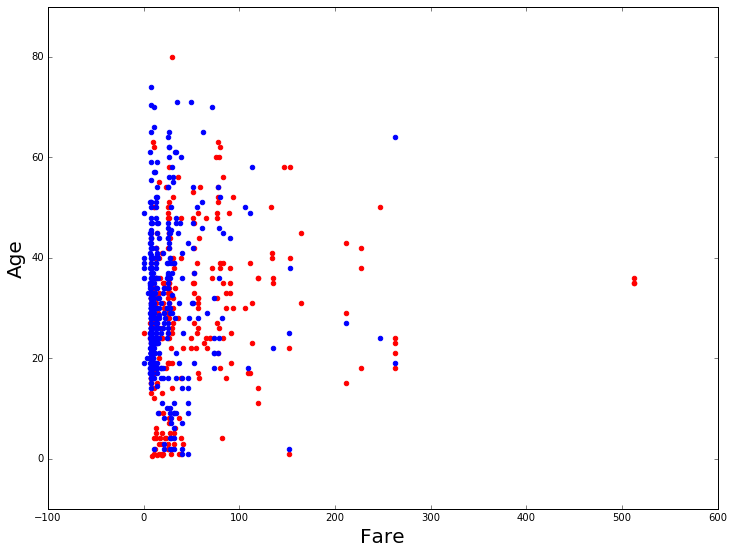

In [6]:
plt.figure(figsize=(12, 9))
plt.scatter(train.Fare[train.Survived == 1], train.Age[train.Survived == 1], color='r')
plt.scatter(train.Fare[train.Survived == 0], train.Age[train.Survived == 0], color='b')
plt.ylabel('Age', fontsize=20)
plt.xlabel('Fare', fontsize=20)
plt.show()